In [20]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
os.getcwd()

'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [22]:
from thon.Choose import choose_features
data = choose_features("data/out/features.csv", cv_range = (0, 10), save = False)

C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+04, tolerance: 2.274e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

Alpha estimate: {'model__alpha': 5.0}
16 features selected 



In [4]:
#data = pd.read_csv("data/out/features.csv")

In [23]:
data.columns

Index(['month', 'n', 'altsales_lag12', 'AN_v_lag3', 'bin',
       'g_best_new_cars_lag6', 'g_new_cars_lag6', 'g_used_cars_lag6',
       'GM_lag12', 'GM_v_lag12', 'ltrucksa_lag6', 'new_units_lag3',
       'ngf1_lag3', 'pageviews_lag12', 'tmaturity_lag12', 'XOM_lag6'],
      dtype='object')

In [24]:
# Training data
X, y = data.drop(columns = ['n']), data['n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, shuffle = False)

In [25]:
# Training data

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
train_pred = pd.Series(model.predict(X_train), index=X_train.index)
test_pred = pd.Series(model.predict(X_test), index =X_test.index)

In [26]:
train_pred = train_pred.sort_index()
y_train = y_train.sort_index()
test_pred = test_pred.sort_index()
y_test = y_test.sort_index()

Predictions

1008.9412258529409

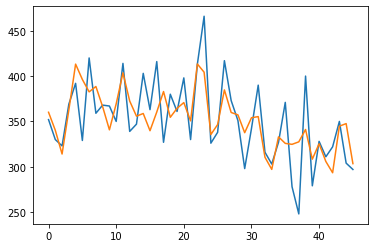

In [27]:
plt.plot(y_train)
plt.plot(train_pred)
mean_squared_error(train_pred, y_train)

14868.41512993406

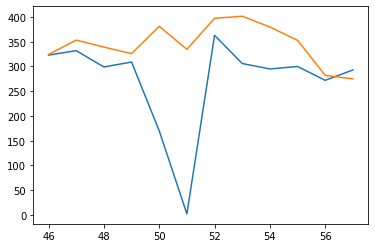

In [28]:
plt.plot(y_test)
plt.plot(test_pred)
mean_squared_error(test_pred, y_test)

In [11]:
from pandas.plotting import lag_plot, autocorrelation_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

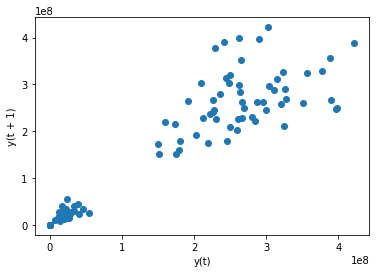

In [12]:
lag_plot(data, 1)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

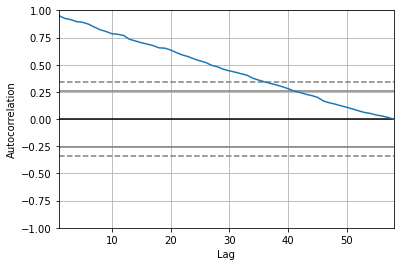

In [13]:
autocorrelation_plot(data)